<a href="https://colab.research.google.com/github/lhajabi/ML_PROJECT/blob/main/sleep_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    452 non-null    int64  
 1   Age                   452 non-null    int64  
 2   Gender                452 non-null    object 
 3   Bedtime               452 non-null    object 
 4   Wakeup time           452 non-null    object 
 5   Sleep duration        452 non-null    float64
 6   Sleep efficiency      452 non-null    float64
 7   REM sleep             452 non-null    int64  
 8   Deep sleep            452 non-null    int64  
 9   Light sleep           452 non-null    int64  
 10  Awakenings            432 non-null    float64
 11  Caffeine consumption  427 non-null    float64
 12  Alcohol consumption   438 non-null    float64
 13  Smoking status        452 non-null    object 
 14  Exercise frequency    446 non-null    float64
dtypes: float64(6), int64(5)

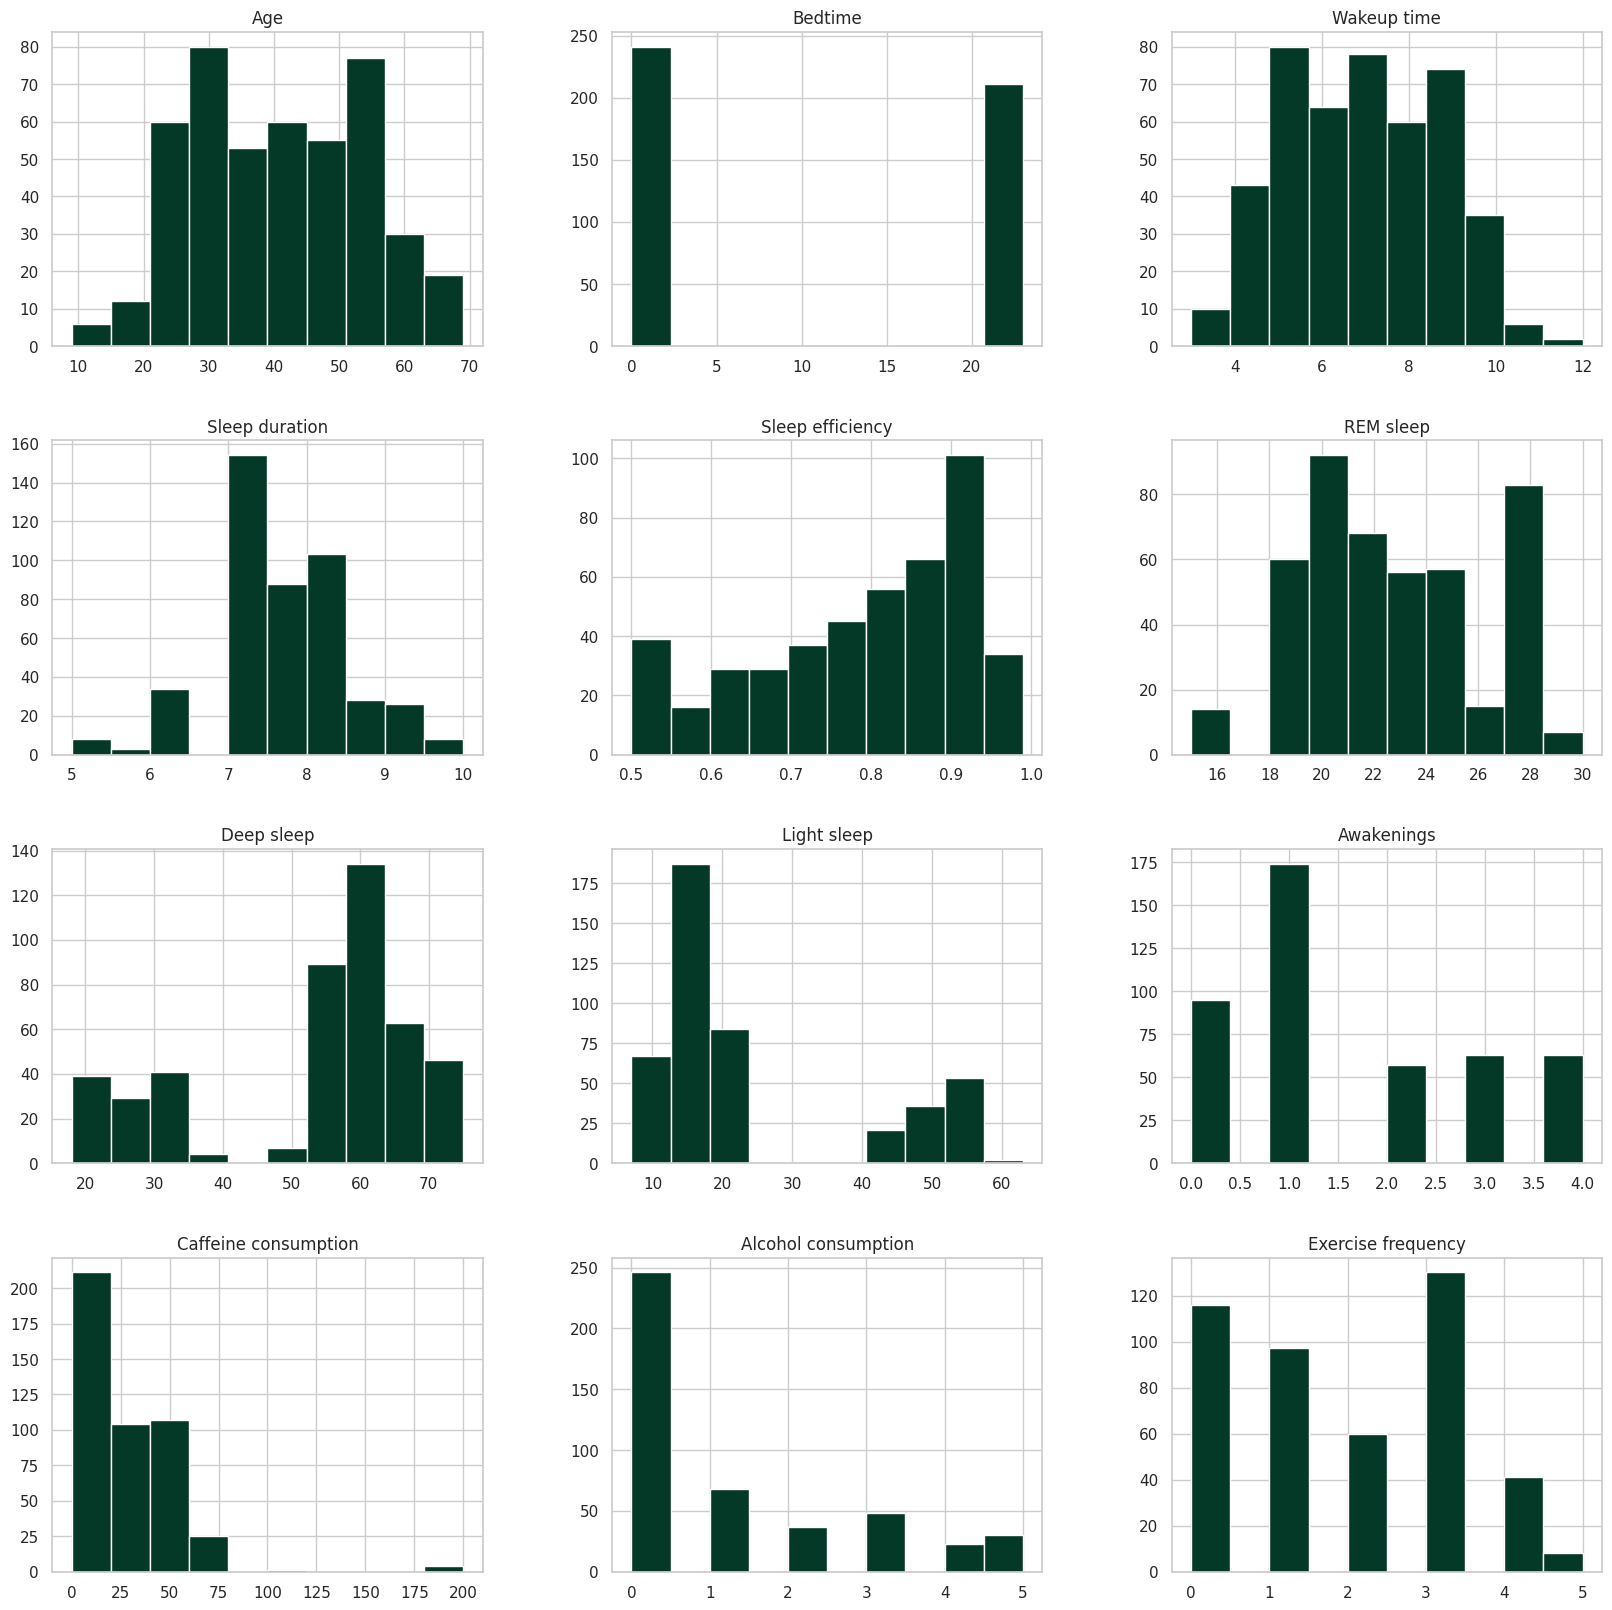

In [ ]:
from pickle import FALSE
from pandas.plotting import scatter_matrix
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder

url = "https://raw.githubusercontent.com/lhajabi/ML_PROJECT/main/Sleep_Efficiency.csv"
df = pd.read_csv(url)

#Rename columns in dataset
df = df.rename(columns={'Deep sleep percentage': 'Deep sleep'})
df = df.rename(columns={'Light sleep percentage': 'Light sleep'})
df = df.rename(columns={'REM sleep percentage': 'REM sleep'})

#Data Descreption
df.info()

# count the number of null values in each column
num_null = df.isnull().sum()
print(f"\nNumber of null values in each column:\n{num_null}")

#fill null values
avg_alcohol = int(df['Alcohol consumption'].mean())
df['Alcohol consumption'].fillna(avg_alcohol, inplace=True)

median_awakenings = df['Awakenings'].median()
df['Awakenings'].fillna(median_awakenings, inplace=True)

median_exercise_freq = df['Exercise frequency'].median()
df['Exercise frequency'].fillna(median_exercise_freq, inplace=True)

median_caffeine = df['Caffeine consumption'].median()
df['Caffeine consumption'].fillna(median_caffeine, inplace=True)
print(" -> Filled required null values\n")

# count the number of null values in each column after adjustment
num_null = df.isnull().sum()
print(f"\nNumber of null values in each column:\n{num_null}")

#ID unique count check
unique = df['ID'].nunique()
print(f"\nNumber of unique IDs : {unique}\n")

# Drop the ID column
df.drop('ID', axis=1, inplace=True)
print(" -> Dropped the ID column")

print(df['Bedtime'])
# Data conversion
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%H')
df['Bedtime'] = df['Bedtime'].astype(int)
print(" -> Converted the Bedtime column to Unix epoch time (24-hour format)")

df['Wakeup time'] = pd.to_datetime(df['Wakeup time'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%H')
df['Wakeup time'] = df['Wakeup time'].astype(int)
print(" -> Converted the Wakeup time column to Unix epoch time (24-hour format)\n")

print(df['Bedtime'])

#Data  Visualization
sns.set_style("whitegrid")
df.hist(figsize=(20,20), color='#043927')
plt.show()


Age count values:
52    19
27    19
37    18
48    17
40    17
      ..
15     1
11     1
9      1
16     1
12     1
Name: Age, Length: 61, dtype: int64


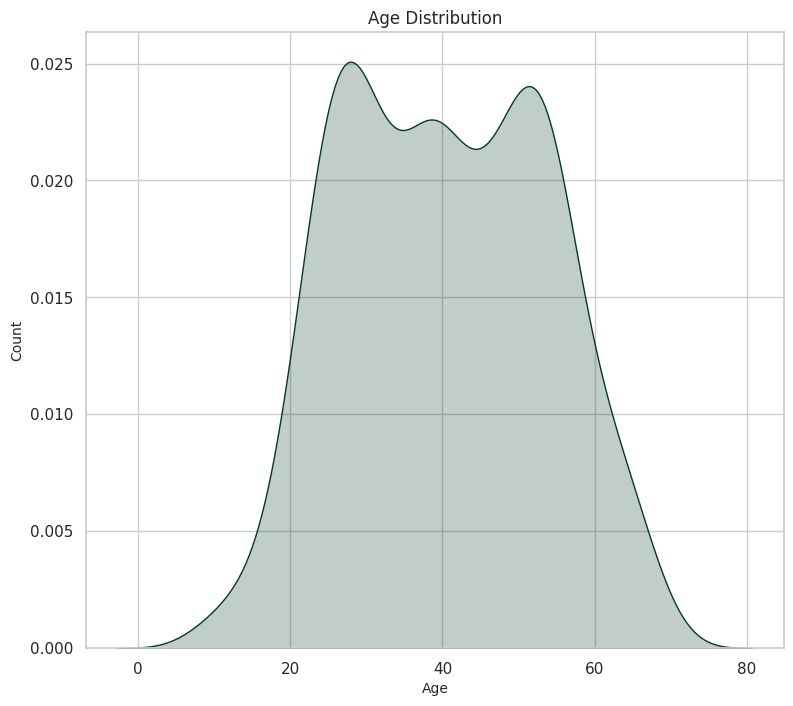




Gender count values:
Male      228
Female    224
Name: Gender, dtype: int64



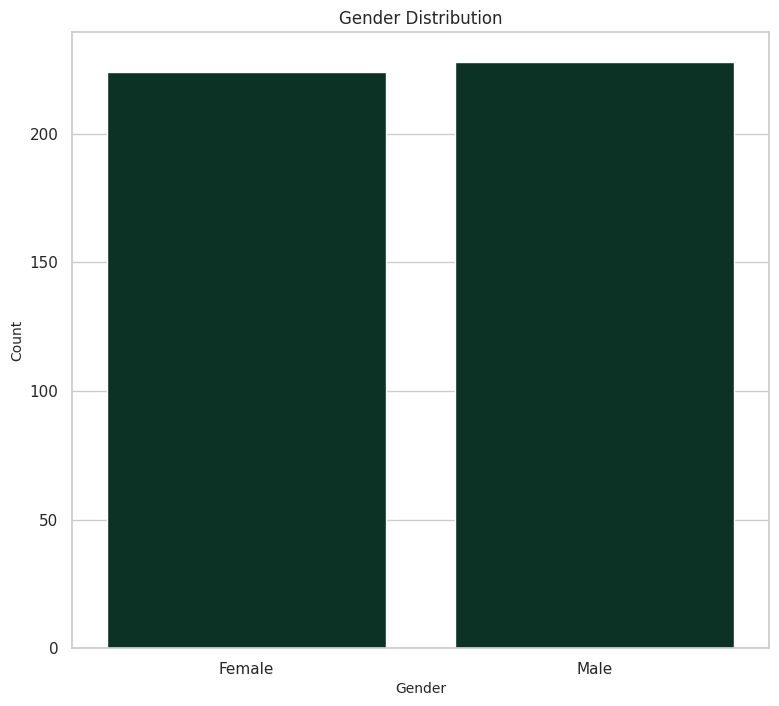

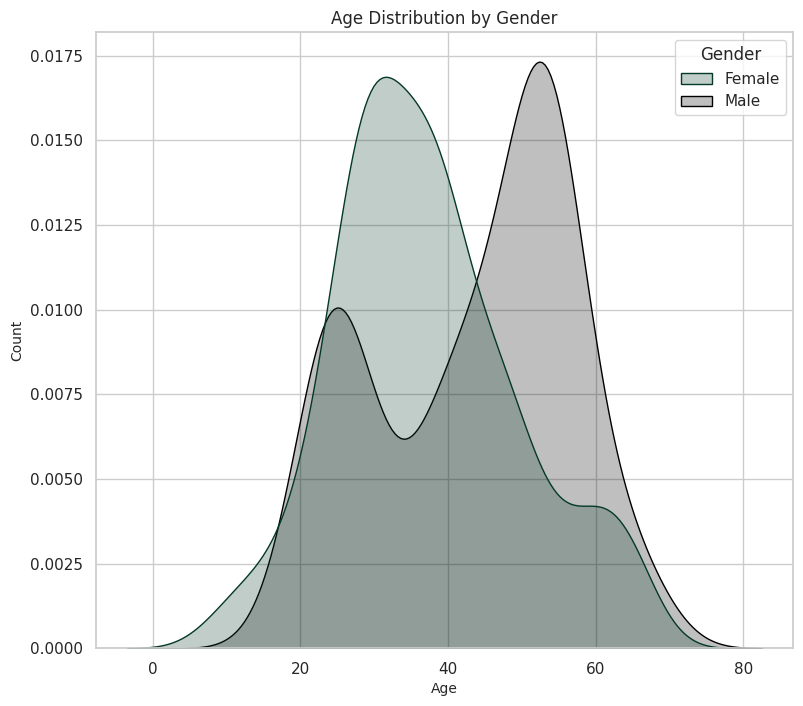

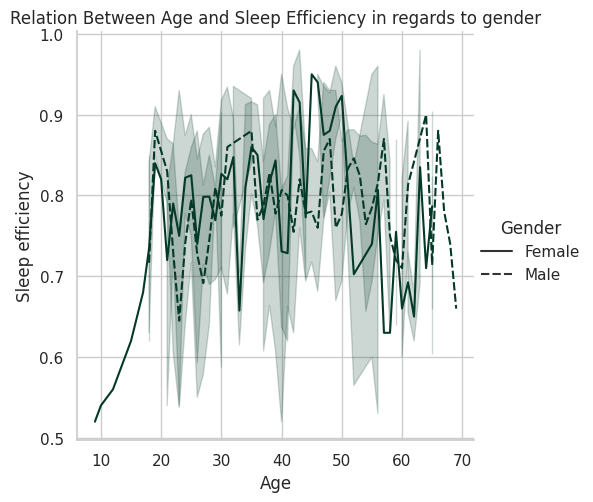

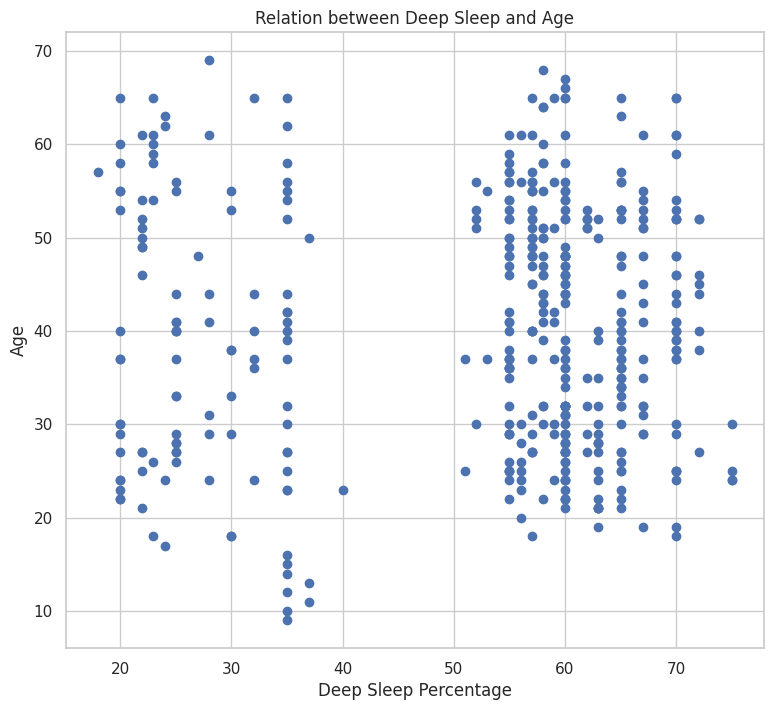

In [ ]:
#Age count
age_counts = df['Age'].value_counts()
print(f"\nAge count values:\n{age_counts}")

#Age Visualization
sns.set_style("whitegrid")
sns.kdeplot(data=df, x="Age", color="#043927", fill=True)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Age Distribution", fontsize=12)
plt.show()
print("\n")

#Gender count
gender_counts = df['Gender'].value_counts()
print(f"\nGender count values:\n{gender_counts}\n")

#Gender Visualization
sns.set_style("whitegrid")
sns.countplot(data=df, x="Gender", color="#043927")
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Gender Distribution", fontsize=12)
plt.show()
print("\n")


sns.set_style("whitegrid")
sns.kdeplot(data=df, x="Age", hue="Gender", fill=True, palette=["#043927", "black"])
plt.xlabel("Age", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title("Age Distribution by Gender", fontsize=12)
plt.show()
print("\n")

#Age and sleep relation in regards to gender
sns.relplot(
    data=df, kind="line",
    x="Age", y="Sleep efficiency",style="Gender", color="#043927")
plt.title('Relation Between Age and Sleep Efficiency in regards to gender')
plt.show()
print("\n")

#Age and Deep sleep relation
plt.scatter(df['Deep sleep'], df['Age'])
plt.xlabel('Deep Sleep Percentage')
plt.ylabel('Age')
plt.title('Relation between Deep Sleep and Age')
plt.show()


Smoking status count values:
No     298
Yes    154
Name: Smoking status, dtype: int64


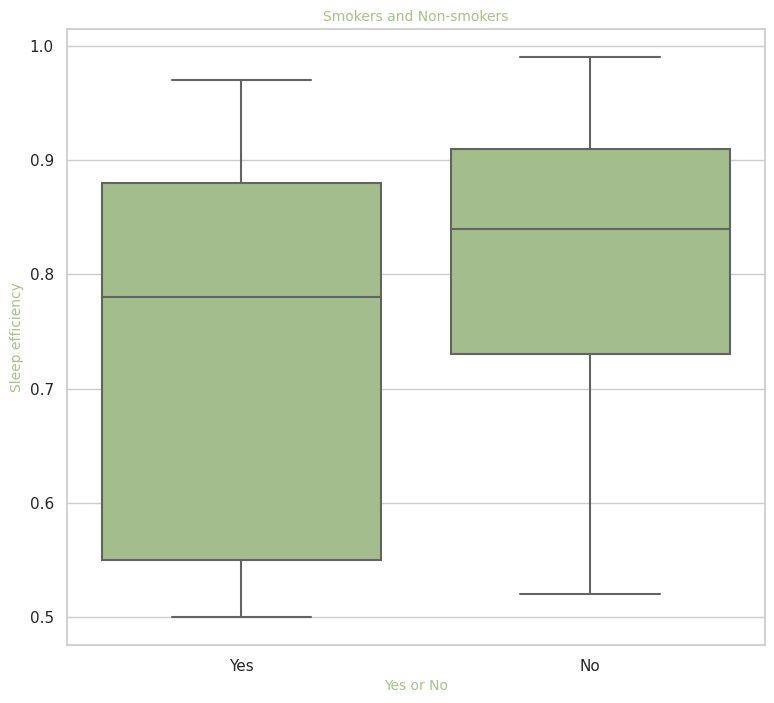

In [ ]:
#Smoking status count
smoking_counts = df['Smoking status'].value_counts()
print(f"\nSmoking status count values:\n{smoking_counts}")

sns.boxplot(data=df,x="Smoking status",y="Sleep efficiency", color="#a3c585")
plt.xlabel("Yes or No", color="#a3c585",fontsize=10)
plt.ylabel("Sleep efficiency", color="#a3c585",fontsize=10)
plt.title("Smokers and Non-smokers", color="#a3c585",fontsize=10)
plt.show()

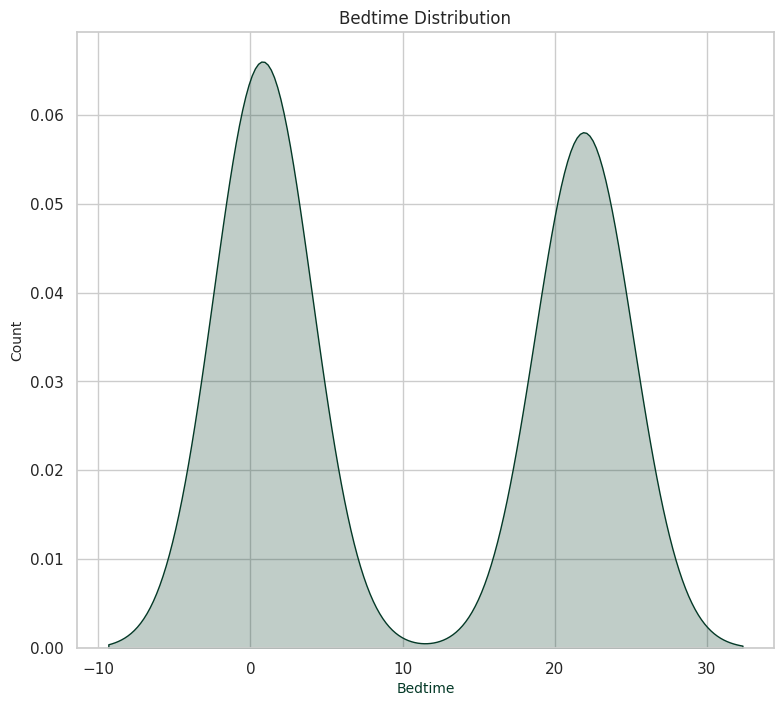

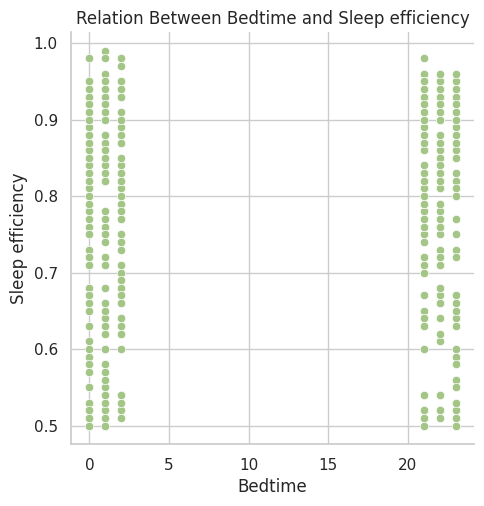

<Figure size 1000x800 with 0 Axes>

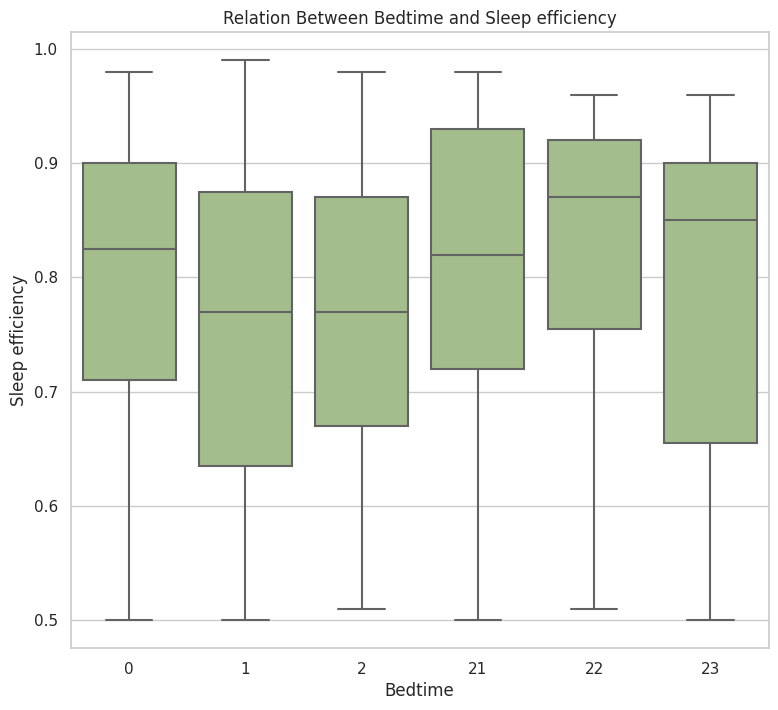

<Figure size 1000x800 with 0 Axes>

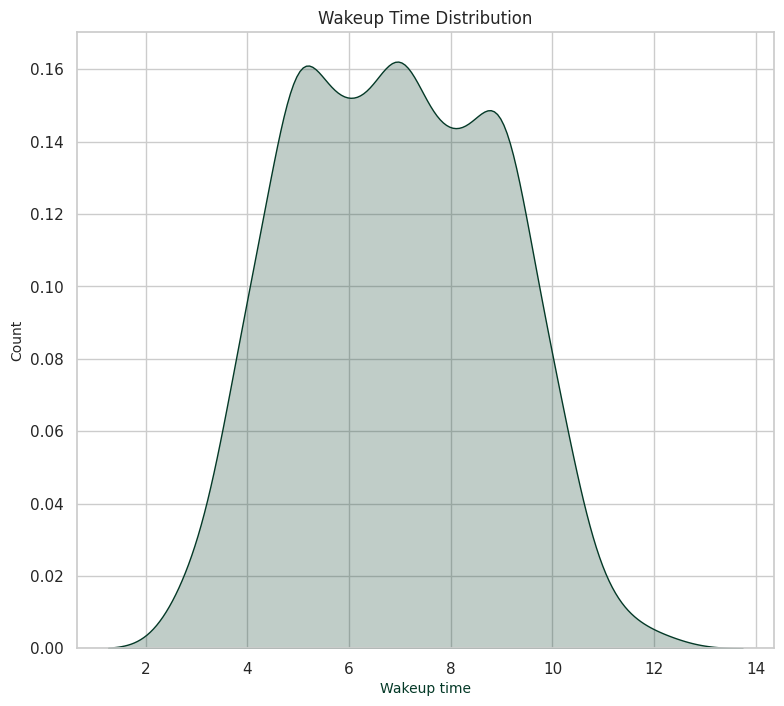

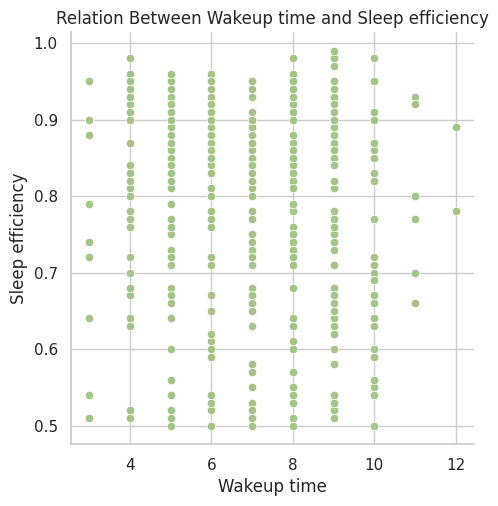

<Figure size 1000x800 with 0 Axes>

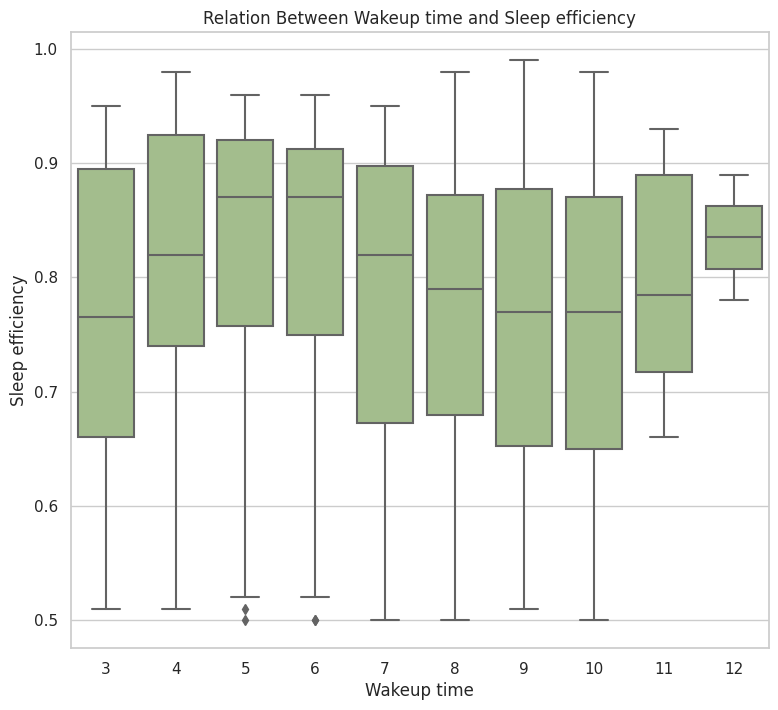

<Figure size 1000x800 with 0 Axes>

'#drop the wakeup time column since it\'s already used in sleep efficiency\ndf.drop(\'Wakeup time\', axis=1, inplace=True)\nprint(" -> Dropped the Wakeup time column")'

In [ ]:
#Bedtime Visualization
sns.set_style("whitegrid") # Set the style of the plot
sns.kdeplot(data=df, x="Bedtime", color='#043927', fill=True)
plt.xlabel("Bedtime", fontsize=10, color='#043927') # Remove unnecessary color parameter
plt.ylabel("Count", fontsize=10) # Capitalize the "C" in "Count"
plt.title("Bedtime Distribution", fontsize=12) # Make the title more descriptive and slightly larger
plt.show()
print(f"\n")

# Bedtime and sleep relation
sns.relplot(data=df, kind="scatter", x="Bedtime", y="Sleep efficiency", color='#a3c585')
plt.title('Relation Between Bedtime and Sleep efficiency')
plt.figure(figsize=(10, 8))
plt.show()
print("\n")

sns.boxplot(data=df, x="Bedtime", y="Sleep efficiency", color='#a3c585')
plt.title('Relation Between Bedtime and Sleep efficiency')
plt.figure(figsize=(10, 8))
plt.show()
print("\n")
"""#drop the bedtime column since it's already used in sleep efficiency
df.drop('Bedtime', axis=1, inplace=True)
print(" -> Dropped the Bedtime column")"""

#Wakeup Time Visualization
sns.set_style("whitegrid") # Set the style of the plot
sns.kdeplot(data=df, x="Wakeup time", color='#043927', fill=True)
plt.xlabel("Wakeup time", fontsize=10, color='#043927') # Remove unnecessary color parameter
plt.ylabel("Count", fontsize=10) # Capitalize the "C" in "Count"
plt.title("Wakeup Time Distribution", fontsize=12) # Make the title more descriptive and slightly larger
plt.show()
print(f"\n")

#Wakeup time and sleep relation
sns.relplot(data=df, kind="scatter", x="Wakeup time", y="Sleep efficiency", color='#a3c585')
plt.title('Relation Between Wakeup time and Sleep efficiency')
plt.figure(figsize=(10, 8))
plt.show()
print(f"\n")

sns.boxplot(data=df, x="Wakeup time", y="Sleep efficiency", color='#a3c585')
plt.title('Relation Between Wakeup time and Sleep efficiency')
plt.figure(figsize=(10, 8))
plt.show()
print(f"\n")

"""#drop the wakeup time column since it's already used in sleep efficiency
df.drop('Wakeup time', axis=1, inplace=True)
print(" -> Dropped the Wakeup time column")"""

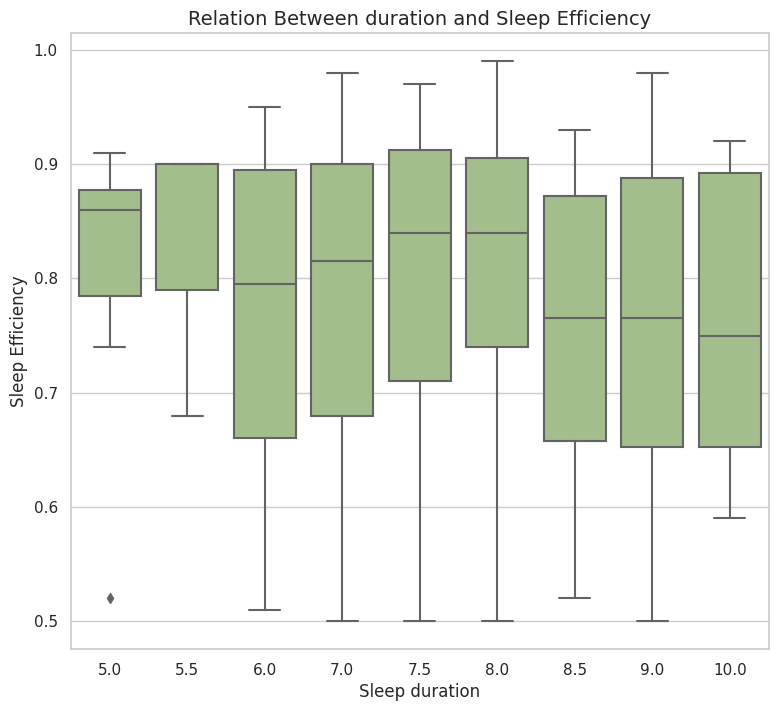




Smooking count values:
No     298
Yes    154
Name: Smoking status, dtype: int64



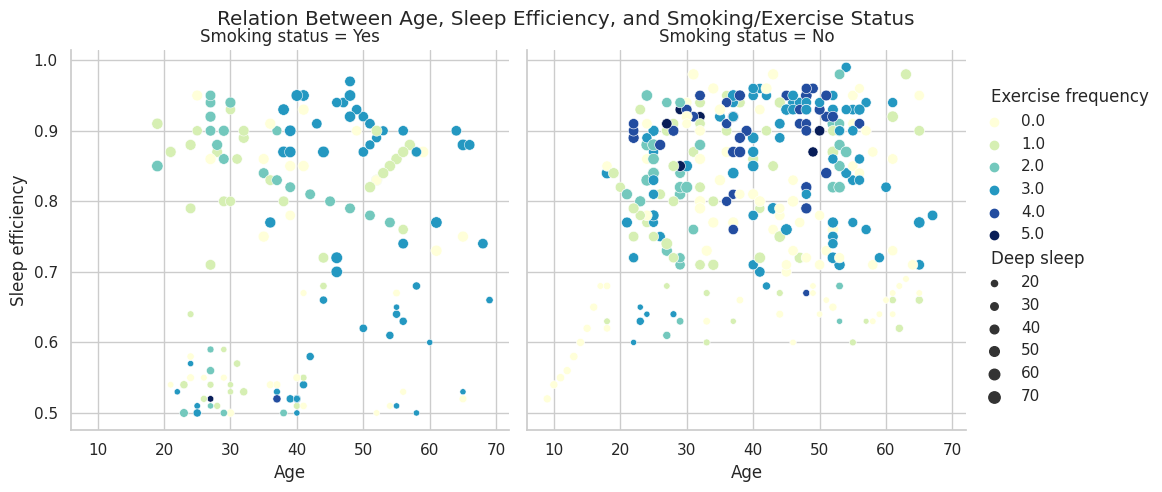

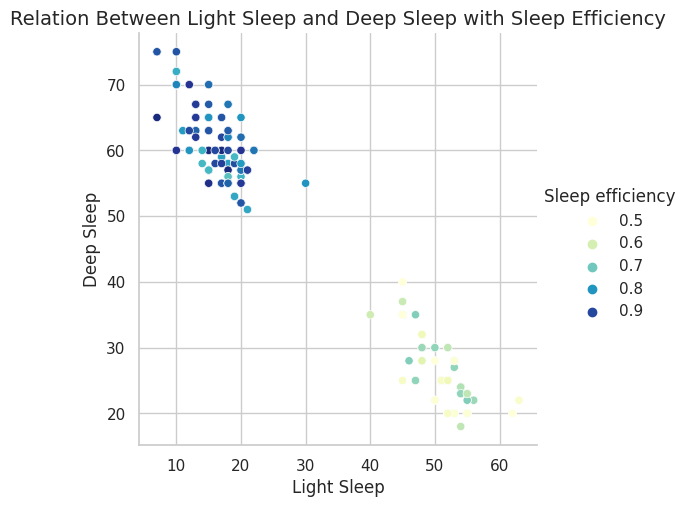

In [ ]:
#Sleep duration and sleep efficiency relation ration and Sleep Efficiency')
sns.set_style("whitegrid")
sns.boxplot(data=df, x="Sleep duration", y="Sleep efficiency" , color='#a3c585')
plt.title("Relation Between duration and Sleep Efficiency", fontsize=14)
plt.xlabel("Sleep duration", fontsize=12)
plt.ylabel("Sleep Efficiency", fontsize=12)
plt.show()
print("\n")

#Smoking status count
smooking_counts = df['Smoking status'].value_counts()
print(f"\nSmooking count values:\n{smooking_counts}\n")

# Age and sleep relation in regards to Exercise, smoking status, and deep sleep
plot = sns.relplot(data=df, x="Age", y="Sleep efficiency", col="Smoking status",
            hue="Exercise frequency", size="Deep sleep", palette="YlGnBu")
plot.fig.suptitle("Relation Between Age, Sleep Efficiency, and Smoking/Exercise Status \n")
plt.subplots_adjust(top=0.9)
plt.show()
print("\n")



# Light/deep sleep relation with sleep efficiency
sns.set_style("whitegrid")
sns.relplot(data=df, x="Light sleep", y="Deep sleep", hue="Sleep efficiency", palette="YlGnBu")
plt.title("Relation Between Light Sleep and Deep Sleep with Sleep Efficiency", fontsize=14)
plt.xlabel("Light Sleep", fontsize=12)
plt.ylabel("Deep Sleep", fontsize=12)
plt.show()
print("\n")


Awakenings count values:
1.0    174
0.0     95
3.0     63
4.0     63
2.0     57
Name: Awakenings, dtype: int64



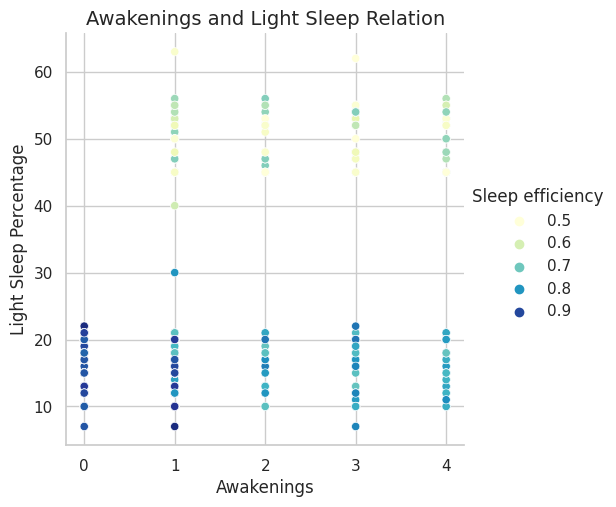

In [ ]:
#Awakenings status count
awakenings_counts = df['Awakenings'].value_counts()
print(f"\nAwakenings count values:\n{awakenings_counts}\n")

#Awakenings and light sleep relation
sns.set_style("whitegrid")
sns.relplot(data=df, x="Awakenings", y="Light sleep", hue="Sleep efficiency", palette="YlGnBu")
plt.title("Awakenings and Light Sleep Relation", fontsize=14)
plt.xlabel("Awakenings", fontsize=12)
plt.ylabel("Light Sleep Percentage", fontsize=12)
plt.show()
print("\n")

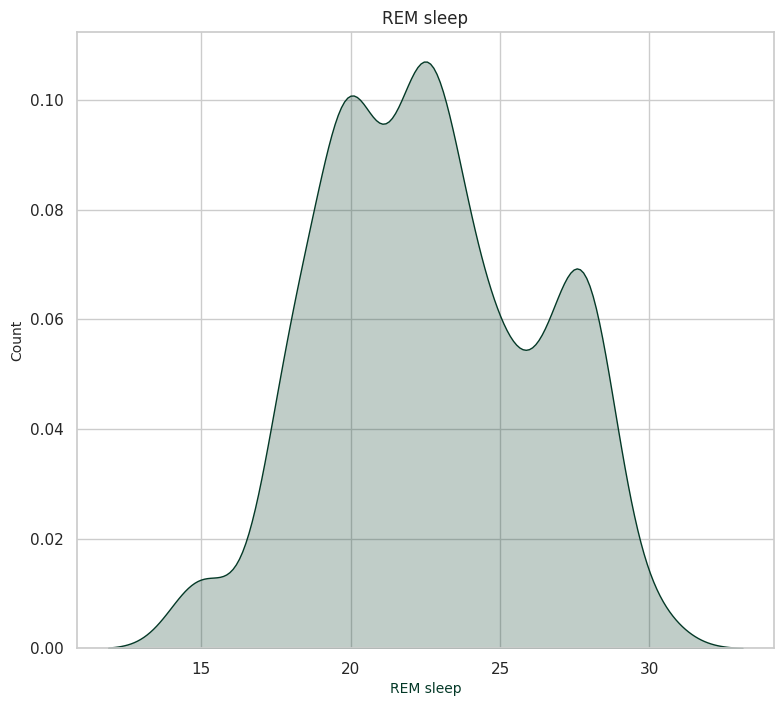

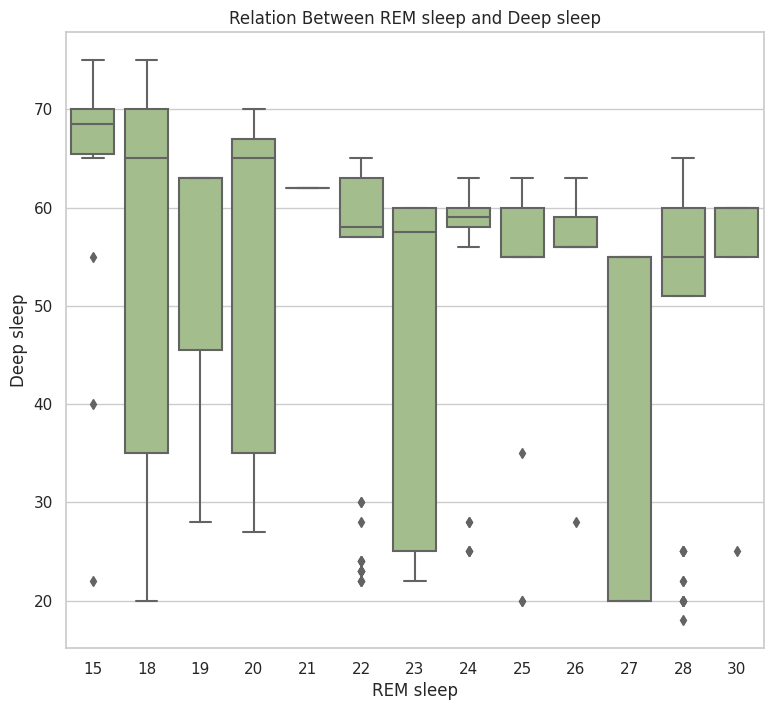

<Figure size 1000x800 with 0 Axes>

In [ ]:
#REM sleep Visualization
sns.set_style("whitegrid")
sns.kdeplot(data=df, x="REM sleep", color='#043927', fill=True)
plt.xlabel("REM sleep", fontsize=10, color='#043927')
plt.ylabel("Count", fontsize=10)
plt.title("REM sleep", fontsize=12)
plt.show()
print(f"\n")

#REM sleep and sleep relation
sns.boxplot(data=df, x="REM sleep", y="Deep sleep", color='#a3c585')
plt.title('Relation Between REM sleep and Deep sleep')
plt.figure(figsize=(10, 8))
plt.show()
print(f"\n")

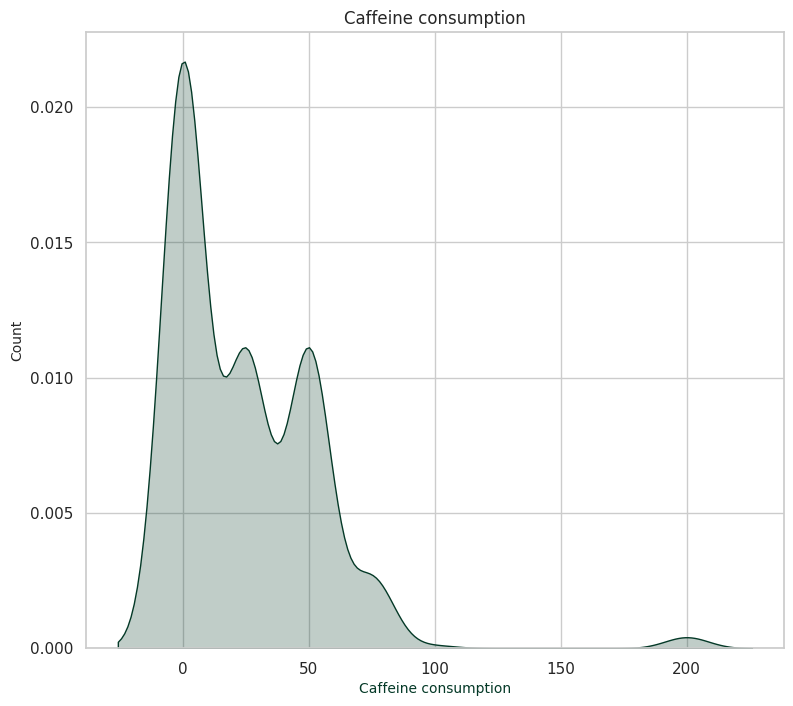

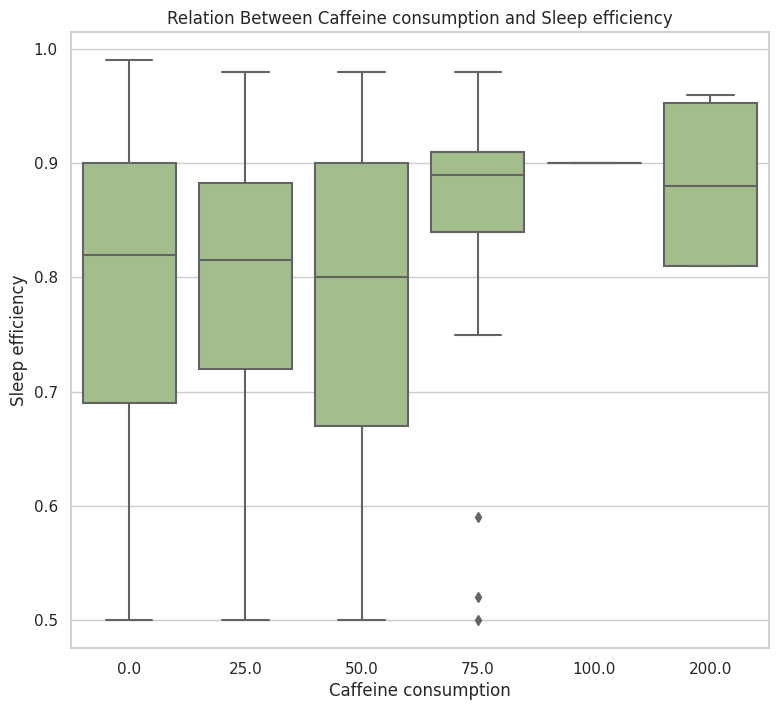

<Figure size 1000x800 with 0 Axes>

In [ ]:
#Caffeine consumption Visualization
sns.set_style("whitegrid")
sns.kdeplot(data=df, x="Caffeine consumption", color='#043927', fill=True)
plt.xlabel("Caffeine consumption", fontsize=10, color='#043927')
plt.ylabel("Count", fontsize=10)
plt.title("Caffeine consumption", fontsize=12)
plt.show()
print(f"\n")

#Caffeine consumption and sleep relation
sns.boxplot(data=df, x="Caffeine consumption", y="Sleep efficiency", color='#a3c585')
plt.title('Relation Between Caffeine consumption and Sleep efficiency')
plt.figure(figsize=(10, 8))
plt.show()
print(f"\n")




Alcohol count values:
0.0    246
1.0     68
3.0     48
2.0     37
5.0     30
4.0     23
Name: Alcohol consumption, dtype: int64



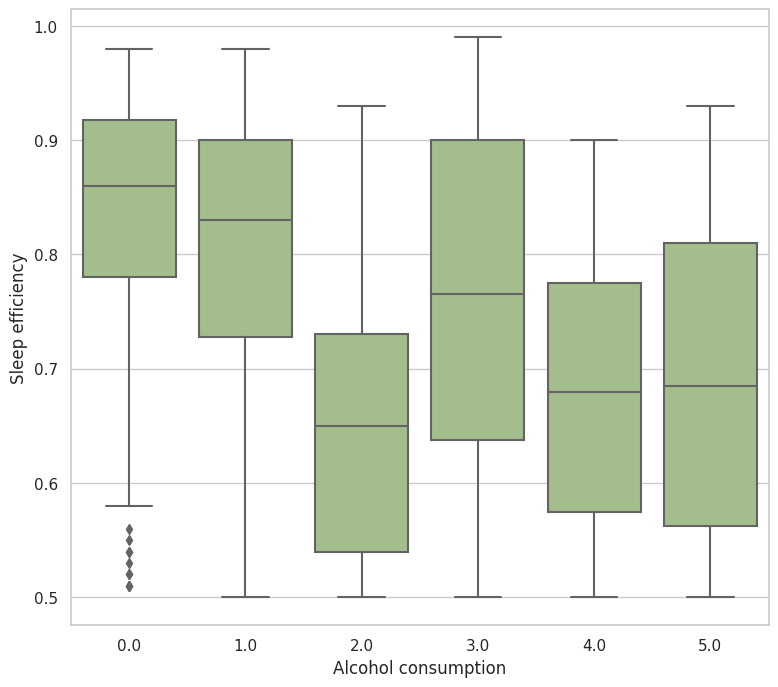

<Figure size 1600x800 with 0 Axes>

In [ ]:
#Alcohol status count
alcohol_counts = df['Alcohol consumption'].value_counts()
print(f"\nAlcohol count values:\n{alcohol_counts}\n")

# alcohol and sleep efficiency relation
sns.boxplot(data=df, x="Alcohol consumption", y="Sleep efficiency", color='#a3c585')
plot.fig.suptitle("Relation between alcohol and sleep efficiency \n")
plt.figure(figsize=(16, 8))
plt.show()
print(f"\n")

<ipython-input-53-9665dc3bcc2d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


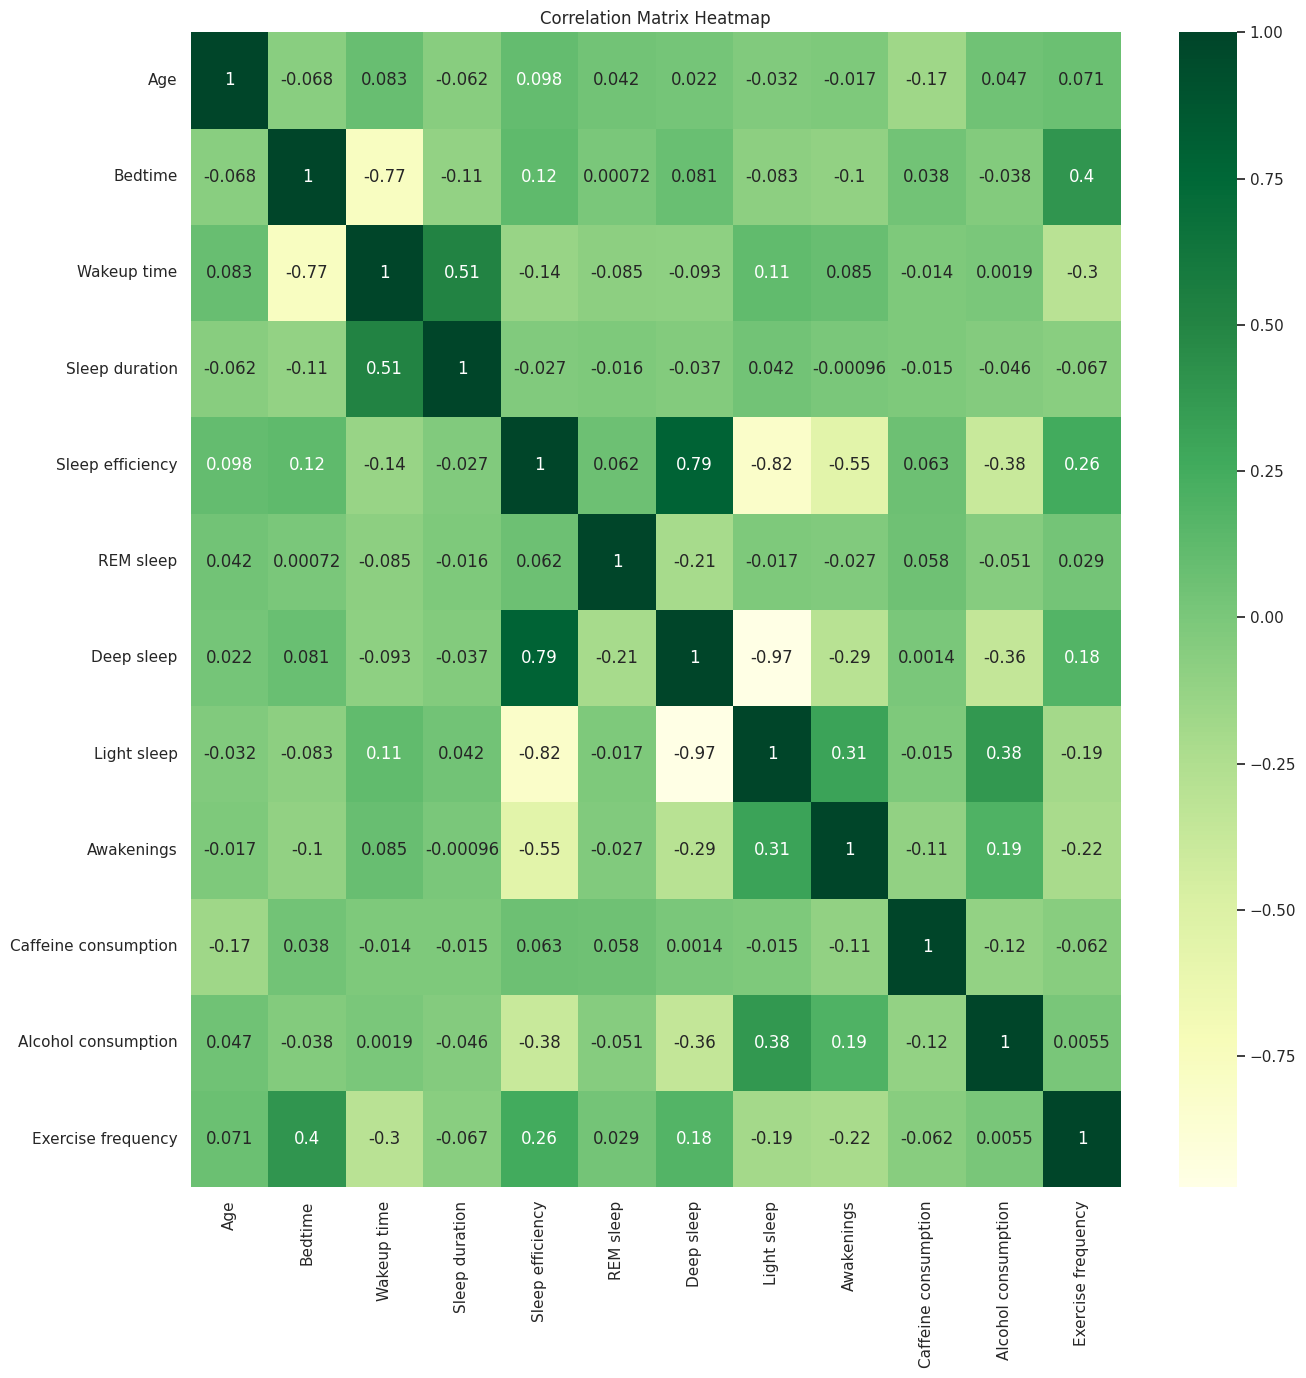

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


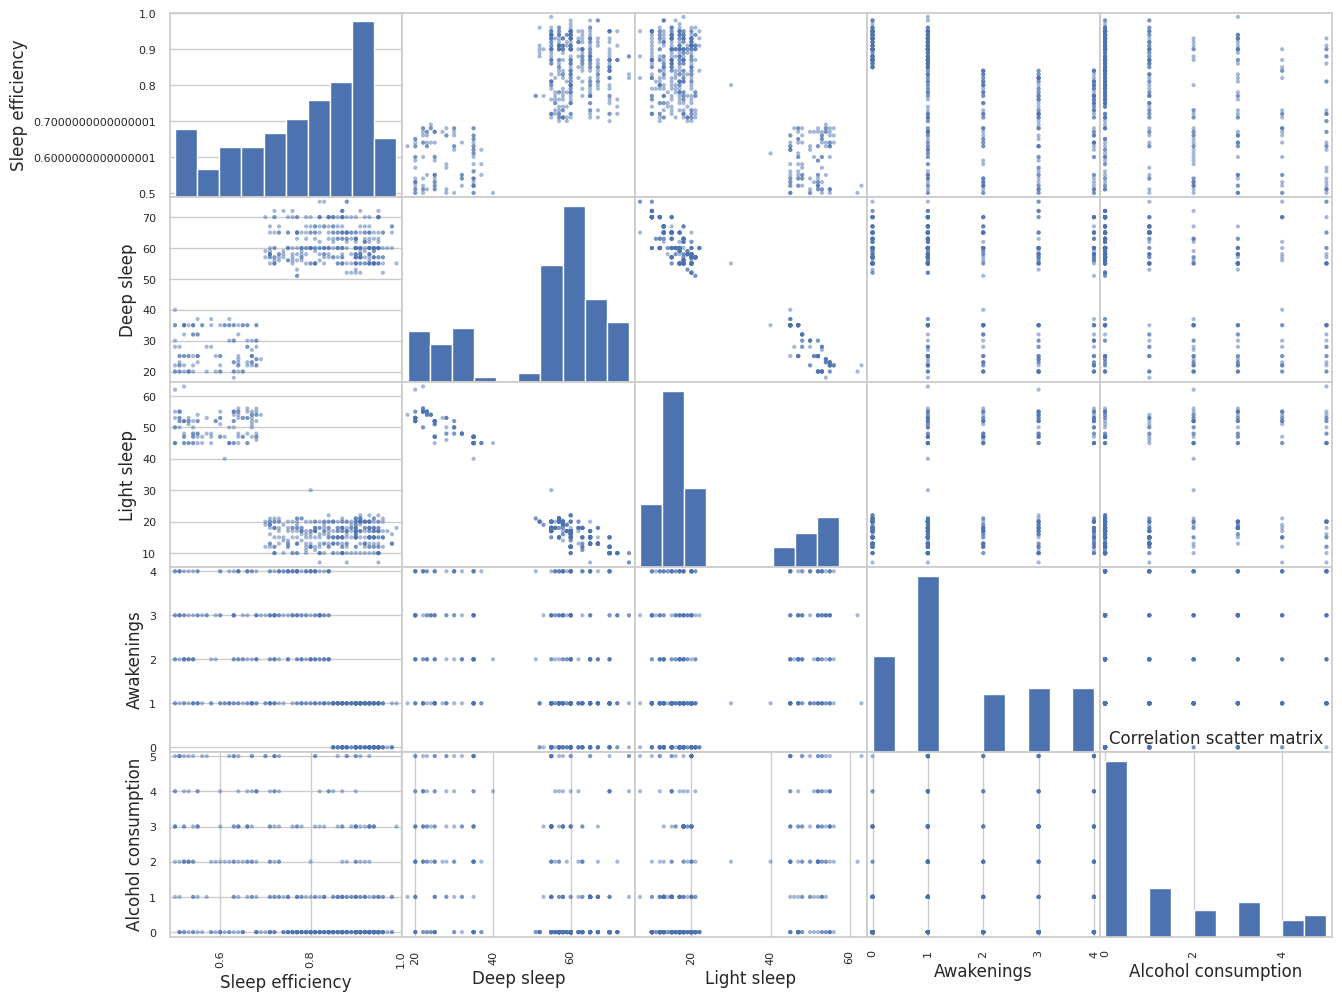

In [ ]:
#Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap="YlGn", annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()
print(f"\n")
#Correlation scatter matrix
attributes = ['Sleep efficiency', 'Deep sleep', 'Light sleep', 'Awakenings', 'Alcohol consumption']
pd.plotting.scatter_matrix(df[attributes], figsize=(15,12), cmap="YlGn")
plt.title('Correlation scatter matrix')
plt.show()

In [ ]:
# Calculate z-scores for each column in the dataframe
z_scores = (df - df.mean()) / df.std()

# Set a threshold for the z-score to identify outliers
threshold = 3

# Find indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Remove outliers from the dataframe
df_1 = df[~np.isin(np.arange(len(df)), outlier_indices[0])]

# Print the shape of the dataframe after removing the outliers
print("The shape of the dataframe after removing the outliers is " + str(df_1.shape))


The shape of the dataframe after removing the outliers is (448, 14)


<ipython-input-54-85bfb5fec07e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (df - df.mean()) / df.std()
<ipython-input-54-85bfb5fec07e>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (df - df.mean()) / df.std()


In [ ]:
# Prepare the data
X_Deep = df.drop(['Light sleep','Sleep efficiency','Deep sleep'], axis=1)
y_Deep = df['Deep sleep'].ravel()

# Perform ordinal encoding on the 'Gender' column
encoder = OrdinalEncoder()
X_Deep_encoded = pd.DataFrame(encoder.fit_transform(X_Deep[['Gender', 'Smoking status']]), columns=['Gender_encoded', 'Smoking_encoded'])

# Drop the original 'Gender' column and concatenate the encoded column
X_Deep.drop(['Gender', 'Smoking status'], axis=1, inplace=True)
X_Deep = pd.concat([X_Deep, X_Deep_encoded], axis=1)

param_grid_X = {
    'n_estimators': [ 10,30,50,100,150],
    'random_state':[42],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
    }
param_grid_R = {
    'n_estimators': [ 10,30,50,100,150],
    'random_state':[42],
    'max_features': [2,4,6,8]
    }
param_grid_DT = {
    'max_features': [2, 4, 6, 8],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state':[42]
    }
param_grid_L = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
 }

# Split the data into training and testing sets
X_Deep_train, X_Deep_test, y_Deep_train, y_Deep_test = train_test_split(X_Deep, y_Deep,test_size=0.2, stratify=X_Deep['Gender_encoded'], random_state=42)

# Create an instance of XGBRegressor,RandomForestRegressor,DecisionTreeRegressor,LinearRegression
model_xgb_Deep = XGBRegressor()
model_RandomForest_Deep = RandomForestRegressor()
model_DecisionTree_Deep = DecisionTreeRegressor()
model_Linear_Deep = LinearRegression()

# Gridsearch for each model
grid_search_X = GridSearchCV(estimator=model_xgb_Deep, param_grid=param_grid_X, scoring='neg_mean_squared_error', cv=5)
grid_search_R = GridSearchCV(estimator=model_RandomForest_Deep, param_grid=param_grid_R, scoring='neg_mean_squared_error', cv=5)
grid_search_D = GridSearchCV(estimator=model_DecisionTree_Deep, param_grid=param_grid_DT, scoring='neg_mean_squared_error', cv=5)
grid_search_L = GridSearchCV(estimator=model_Linear_Deep, param_grid=param_grid_L, scoring='neg_mean_squared_error', cv=5)

# Train the models
model_xgb_Deep.fit(X_Deep_train, y_Deep_train)
model_RandomForest_Deep.fit(X_Deep_train, y_Deep_train)
model_DecisionTree_Deep.fit(X_Deep_train, y_Deep_train)
model_Linear_Deep.fit(X_Deep_train, y_Deep_train)
# Train Gridsearch
grid_search_X.fit(X_Deep_train, y_Deep_train)
grid_search_R.fit(X_Deep_train, y_Deep_train)
grid_search_D.fit(X_Deep_train,y_Deep_train)
grid_search_L.fit(X_Deep_train, y_Deep_train)

# Make predictions on the testing data
y_Deep_pred_XGB = model_xgb_Deep.predict(X_Deep_test)
y_Deep_pred_RandomForest = model_RandomForest_Deep.predict(X_Deep_test)
y_Deep_pred_DecisionTree = model_DecisionTree_Deep.predict(X_Deep_test)
y_Deep_pred_Linear = model_Linear_Deep.predict(X_Deep_test)

# Gridsearch parameters
best_params_XGB = grid_search_X.best_params_
best_params_RF = grid_search_R.best_params_
best_params_DT = grid_search_D.best_params_
best_params_Lin = grid_search_L.best_params_

# Model and prediction
best_model_XGB = grid_search_X.best_estimator_
y_Deep_pred_GridX = best_model_XGB.predict(X_Deep_test)
best_model_RF = grid_search_R.best_estimator_
y_Deep_pred_GridR = best_model_RF.predict(X_Deep_test)
best_model_DT = grid_search_D.best_estimator_
y_Deep_pred_GridD = best_model_DT.predict(X_Deep_test)
best_model_Lin = grid_search_L.best_estimator_
y_Deep_pred_GridL = best_model_Lin.predict(X_Deep_test)

# Evaluate the model's performance
print( mean_squared_error(y_Deep_test, y_Deep_pred_XGB),"XGB MSE:")
print( mean_squared_error(y_Deep_test, y_Deep_pred_RandomForest),"RandomF MSE:")
print( mean_squared_error(y_Deep_test, y_Deep_pred_DecisionTree),"DecisionT MSE:")
print( mean_squared_error(y_Deep_test, y_Deep_pred_Linear),"Linear MSE:")

print( mean_squared_error(y_Deep_test, y_Deep_pred_GridX),"GridX MSE:")
print( mean_squared_error(y_Deep_test, y_Deep_pred_GridR),"GridR MSE:")
print( mean_squared_error(y_Deep_test, y_Deep_pred_GridD),"GridD MSE:")
print( mean_squared_error(y_Deep_test, y_Deep_pred_GridL),"GridL MSE:")
print(f'\n')
print( mean_absolute_error(y_Deep_test, y_Deep_pred_XGB),"XGB MAE:")
print( mean_absolute_error(y_Deep_test, y_Deep_pred_RandomForest),"RandomF MAE:")
print( mean_absolute_error(y_Deep_test, y_Deep_pred_DecisionTree),"DecisionT MAE:")
print( mean_absolute_error(y_Deep_test, y_Deep_pred_Linear),"Linear MAE:")
print(f'\n')
print(mean_absolute_error(y_Deep_test, y_Deep_pred_GridX),"GridX MAE:")
print(mean_absolute_error(y_Deep_test, y_Deep_pred_GridR),"GridR MAE:")
print(mean_absolute_error(y_Deep_test, y_Deep_pred_GridD),"GridD MAE:")
print(mean_absolute_error(y_Deep_test, y_Deep_pred_GridL),"GridL MAE:")

print( best_params_XGB,best_params_RF,best_params_DT,best_params_Lin)

186.4544206616739 XGB MSE:
152.46474395604395 RandomF MSE:
181.35164835164835 DecisionT MSE:
207.76783684195723 Linear MSE:
156.35780272018542 GridX MSE:
152.5174648351648 GridR MSE:
185.18879352281854 GridD MSE:
207.76783684195723 GridL MSE:


9.008415096408719 XGB MAE:
8.572637362637362 RandomF MAE:
7.21978021978022 DecisionT MAE:
11.69855601933059 Linear MAE:


9.13236896808331 GridX MAE:
9.157472527472528 GridR MAE:
8.570424341985598 GridD MAE:
11.69855601933059 GridL MAE:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 42} {'max_features': 4, 'n_estimators': 100, 'random_state': 42} {'max_depth': 7, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 10, 'random_state': 42} {'copy_X': True, 'fit_intercept': True}


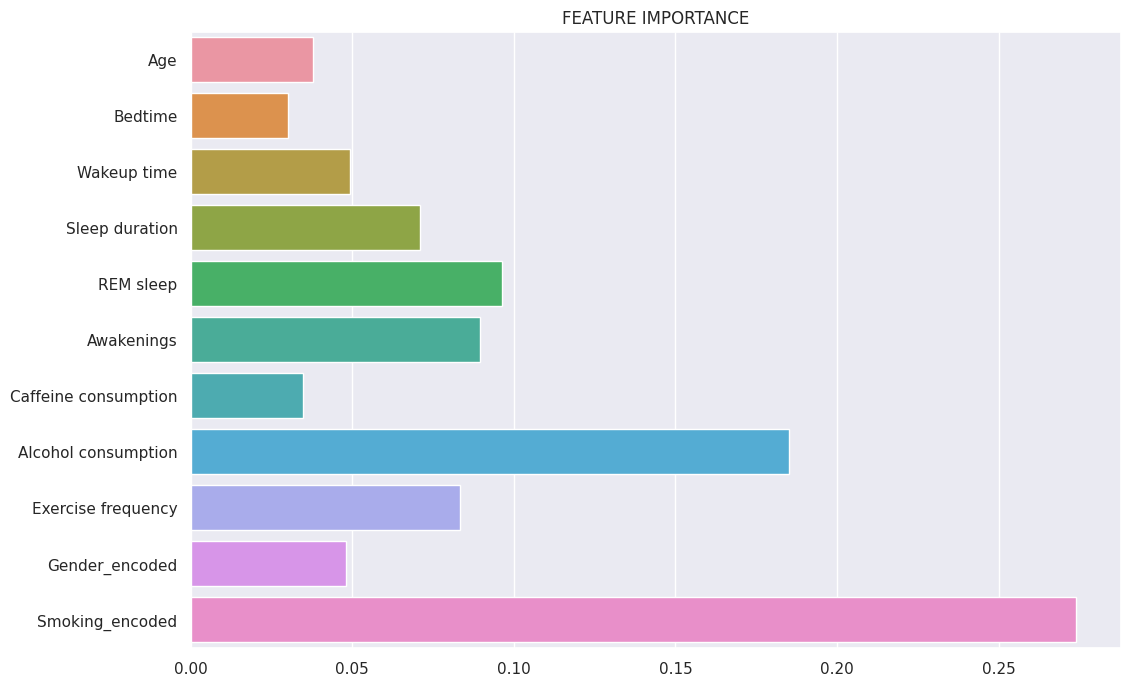

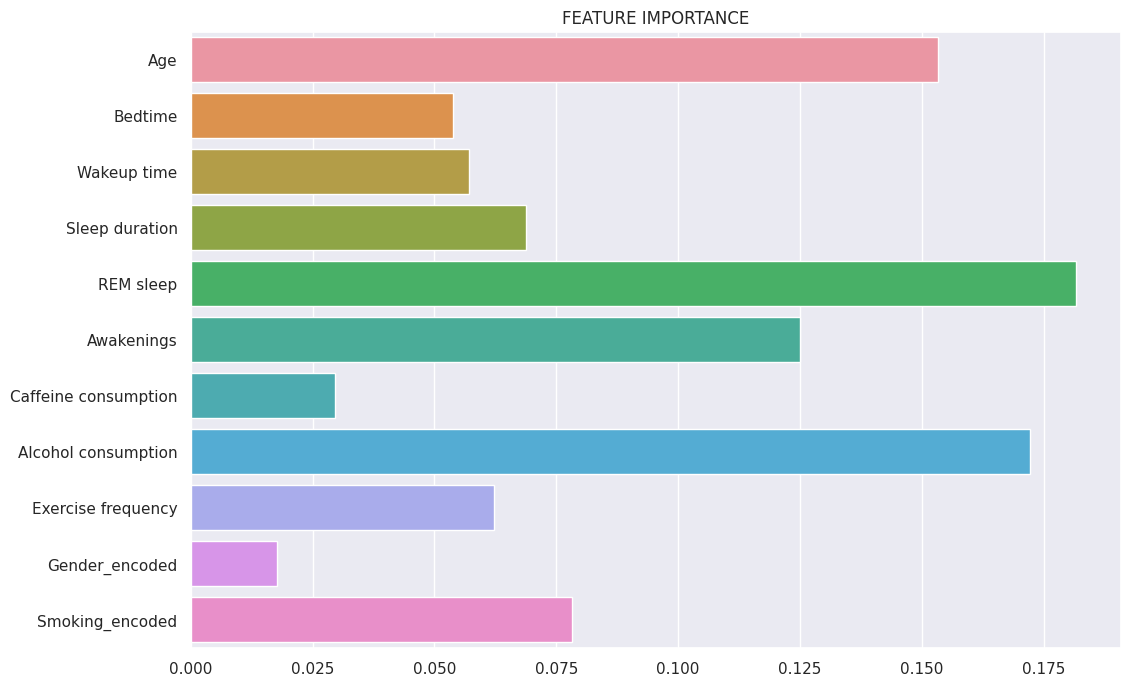

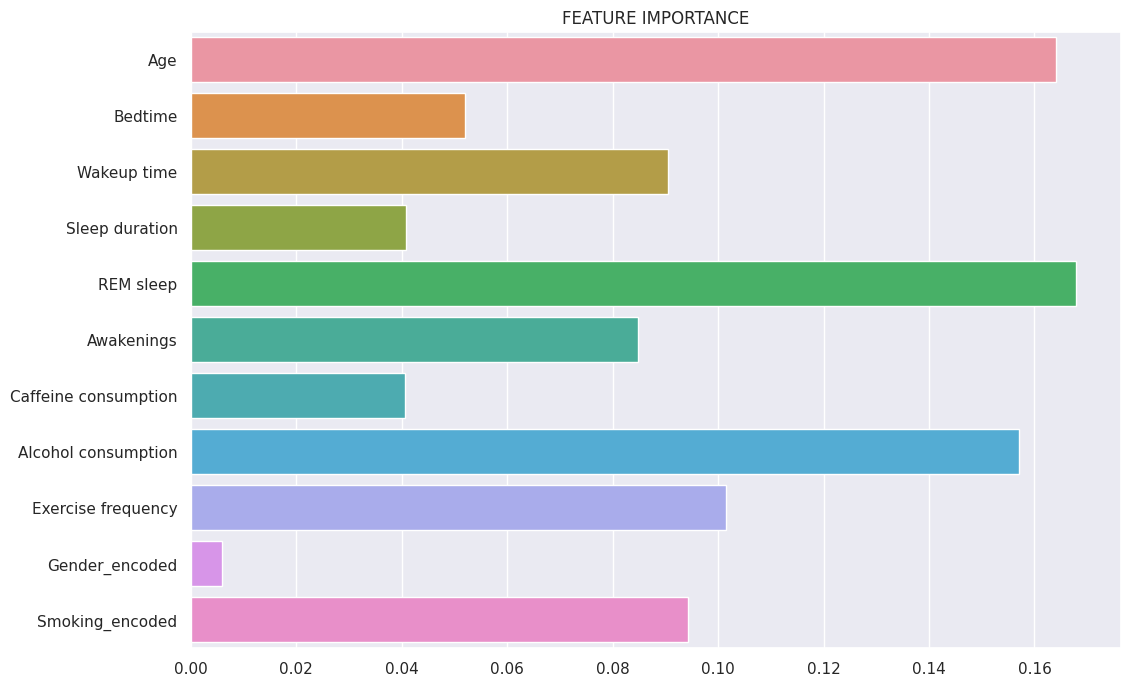

In [ ]:
# Plot the feature importance of the classifier using seaborn
sns.set_style('whitegrid')
sns.set_context('poster')
sns.set_palette('colorblind')
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=model_xgb_Deep.feature_importances_, y=X_Deep.columns)
plt.title('FEATURE IMPORTANCE')
plt.show()
# Plot the feature importance of the classifier for RandomForest
sns.barplot(x=model_RandomForest_Deep.feature_importances_, y=X_Deep.columns)
plt.title('FEATURE IMPORTANCE')
plt.show()
# Plot the feature importance of the classifier for RandomForest
sns.barplot(x=model_DecisionTree_Deep.feature_importances_, y=X_Deep.columns)
plt.title('FEATURE IMPORTANCE')
plt.show()

In [ ]:
# Prepare the data
X_Light = df.drop(['Light sleep','Sleep efficiency','Deep sleep'], axis=1)
y_Light = df['Light sleep'].ravel()

# Perform ordinal encoding on the 'Gender' column
encoder = OrdinalEncoder()
X_Light_encoded = pd.DataFrame(encoder.fit_transform(X_Light[['Gender', 'Smoking status']]), columns=['Gender_encoded', 'Smoking_encoded'])

# Drop the original 'Gender' column and concatenate the encoded column
X_Light.drop(['Gender', 'Smoking status'], axis=1, inplace=True)
X_Light = pd.concat([X_Light, X_Light_encoded], axis=1)

param_grid_X = {
'n_estimators': [ 10,30,50,100,150],
'random_state':[42],
'learning_rate': [0.01, 0.1, 0.2],
'max_depth': [3, 5, 7]
}
param_grid_R = {
'n_estimators': [ 10,30,50,100,150],
'random_state':[42],
'max_features': [2,4,6,8]
}
param_grid_DT = {
'max_features': [2, 4, 6, 8],
'max_depth': [3, 5, 7],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 3, 5],
'random_state':[42]
}
param_grid_L = {
'fit_intercept': [True, False],
'copy_X': [True, False]
}

# Split the data into training and testing sets
X_Light_train, X_Light_test, y_Light_train, y_Light_test = train_test_split(X_Light, y_Light, test_size=0.2,stratify=X_Light['Gender_encoded'], random_state=42)

# Create an instance of XGBRegressor,RandomForestRegressor,DecisionTreeRegressor,LinearRegression
model_xgb_Light = XGBRegressor()
model_RandomForest_Light = RandomForestRegressor()
model_DecisionTree_Light = DecisionTreeRegressor()
model_Linear_Light = LinearRegression()

#Gridsearch for each model
grid_search_X = GridSearchCV(estimator=model_xgb_Light, param_grid=param_grid_X, scoring='neg_mean_squared_error', cv=5)
grid_search_R = GridSearchCV(estimator=model_RandomForest_Light, param_grid=param_grid_R, scoring='neg_mean_squared_error', cv=5)
grid_search_D = GridSearchCV(estimator=model_DecisionTree_Light, param_grid=param_grid_DT, scoring='neg_mean_squared_error', cv=5)
grid_search_L = GridSearchCV(estimator=model_Linear_Light, param_grid=param_grid_L, scoring='neg_mean_squared_error', cv=5)

# Train the model
model_xgb_Light.fit(X_Light_train, y_Light_train)
model_RandomForest_Light.fit(X_Light_train, y_Light_train)
model_DecisionTree_Light.fit(X_Light_train, y_Light_train)
model_Linear_Light.fit(X_Light_train, y_Light_train)

#Train Gridsearch
grid_search_X.fit(X_Light_train, y_Light_train)
grid_search_R.fit(X_Light_train, y_Light_train)
grid_search_D.fit(X_Light_train,y_Light_train)
grid_search_L.fit(X_Light_train, y_Light_train)

# Make predictions on the testing data
y_Light_pred_XGB = model_xgb_Light.predict(X_Light_test)
y_Light_pred_RandomForest = model_RandomForest_Light.predict(X_Light_test)
y_Light_pred_DecisionTree = model_DecisionTree_Light.predict(X_Light_test)
y_Light_pred_Linear = model_Linear_Light.predict(X_Light_test)

#Gridsearch parameters
best_params_XGB = grid_search_X.best_params_
best_params_RF = grid_search_R.best_params_
best_params_DT = grid_search_D.best_params_
best_params_Lin = grid_search_L.best_params_

#Model and prediction
best_model_XGB = grid_search_X.best_estimator_
y_Light_pred_GridX = best_model_XGB.predict(X_Light_test)
best_model_RF = grid_search_R.best_estimator_
y_Light_pred_GridR = best_model_RF.predict(X_Light_test)
best_model_DT = grid_search_D.best_estimator_
y_Light_pred_GridD = best_model_DT.predict(X_Light_test)
best_model_Lin = grid_search_L.best_estimator_
y_Light_pred_GridL = best_model_Lin.predict(X_Light_test)

# Evaluate the model's performance
print(mean_squared_error(y_Light_test, y_Light_pred_XGB),"XGB MSE:")
print(mean_squared_error(y_Light_test, y_Light_pred_RandomForest),"RandomF MSE:")
print(mean_squared_error(y_Light_test, y_Light_pred_DecisionTree),"DecisionT MSE:")
print(mean_squared_error(y_Light_test, y_Light_pred_Linear),"Linear MSE:")

print(mean_squared_error(y_Light_test, y_Light_pred_GridX),"GridX MSE:")
print(mean_squared_error(y_Light_test, y_Light_pred_GridR),"GridR MSE:")
print(mean_squared_error(y_Light_test, y_Light_pred_GridD),"GridD MSE:")
print(mean_squared_error(y_Light_test, y_Light_pred_GridL),"GridL MSE:")
print(f'\n')
print(mean_absolute_error(y_Light_test, y_Light_pred_XGB),"XGB MAE:")
print(mean_absolute_error(y_Light_test, y_Light_pred_RandomForest),"RandomF MAE:")
print(mean_absolute_error(y_Light_test, y_Light_pred_DecisionTree),"DecisionT MAE:")
print(mean_absolute_error(y_Light_test, y_Light_pred_Linear),"Linear MAE:")
print(f'\n')
print(mean_absolute_error(y_Light_test, y_Light_pred_GridX),"GridX MAE:")
print(mean_absolute_error(y_Light_test, y_Light_pred_GridR),"GridR MAE:")
print(mean_absolute_error(y_Light_test, y_Light_pred_GridD),"GridD MAE:")
print(mean_absolute_error(y_Light_test, y_Light_pred_GridL),"GridL MAE:")

print(best_params_XGB,best_params_RF,best_params_DT,best_params_Lin)

190.9943604065171 XGB MSE:
135.6097527472527 RandomF MSE:
219.1978021978022 DecisionT MSE:
207.76783684195726 Linear MSE:
153.60126859329026 GridX MSE:
147.50407472527473 GridR MSE:
151.0110136941603 GridD MSE:
209.5986461528736 GridL MSE:


9.604482388758397 XGB MAE:
8.040109890109889 RandomF MAE:
8.054945054945055 DecisionT MAE:
11.69855601933059 Linear MAE:


8.933467791630672 GridX MAE:
8.84989010989011 GridR MAE:
9.008826732694327 GridD MAE:
11.693496755662368 GridL MAE:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 30, 'random_state': 42} {'max_features': 6, 'n_estimators': 50, 'random_state': 42} {'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 10, 'random_state': 42} {'copy_X': True, 'fit_intercept': False}


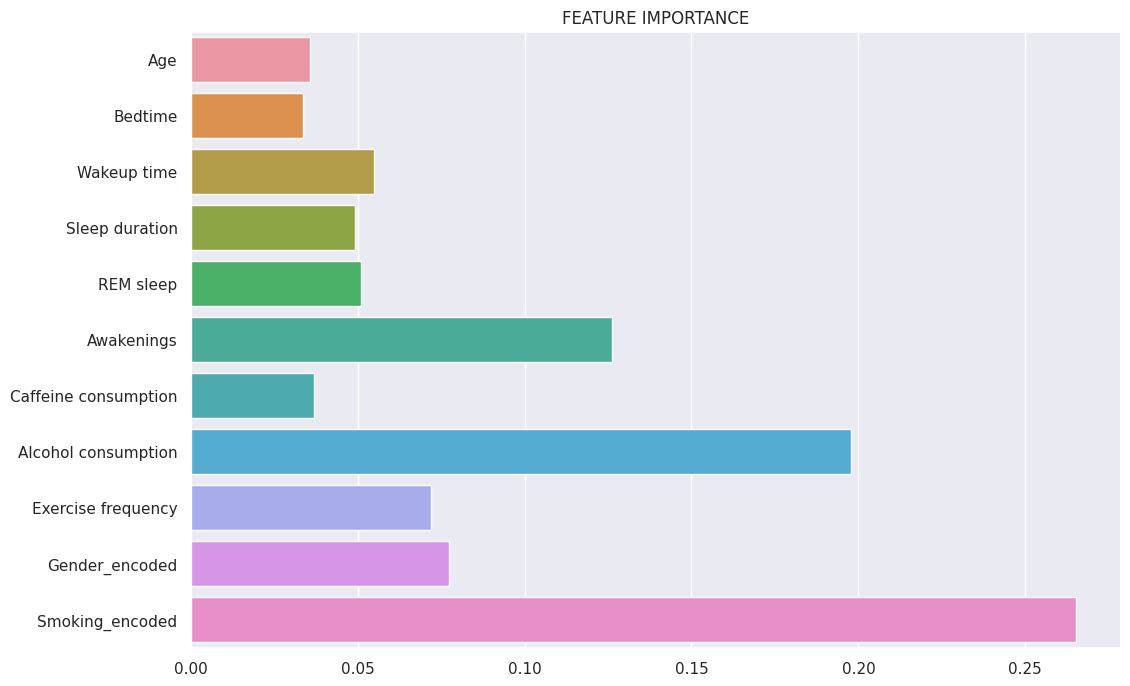

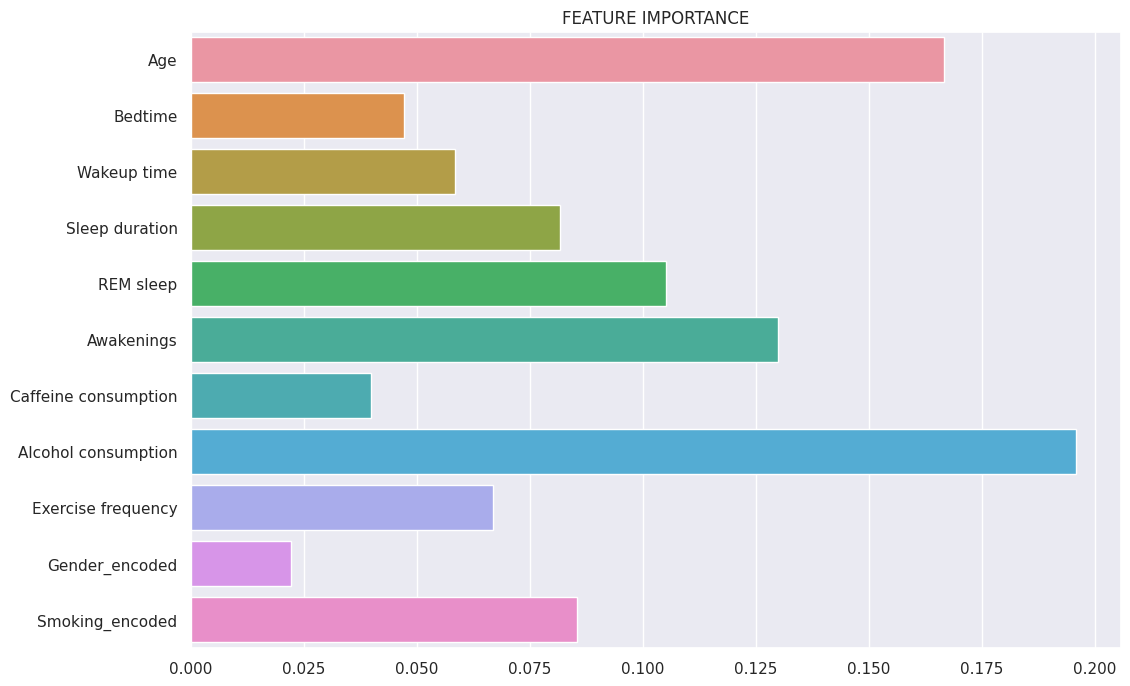

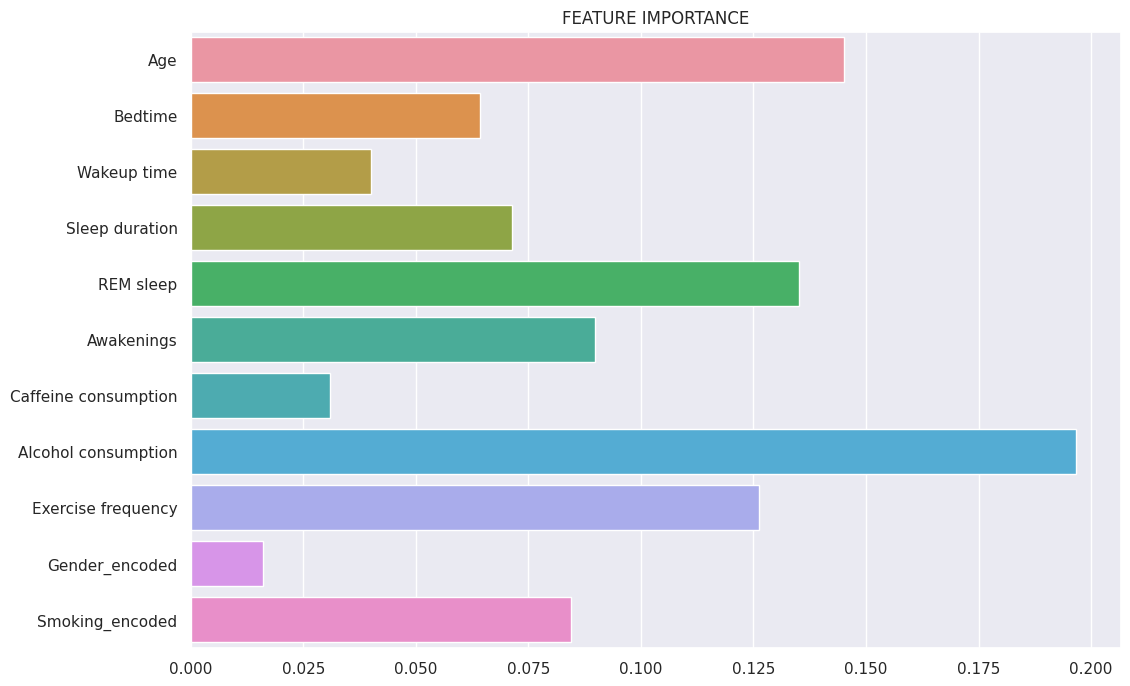

In [ ]:
# Plot the feature importance of the classifier using seaborn
sns.set_style('whitegrid')
sns.set_context('poster')
sns.set_palette('colorblind')
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x=model_xgb_Light.feature_importances_, y=X_Light.columns)
plt.title('FEATURE IMPORTANCE')
plt.show()
# Plot the feature importance of the classifier for RandomForest
sns.barplot(x=model_RandomForest_Light.feature_importances_, y=X_Light.columns)
plt.title('FEATURE IMPORTANCE')
plt.show()
# Plot the feature importance of the classifier for RandomForest
sns.barplot(x=model_DecisionTree_Light.feature_importances_, y=X_Light.columns)
plt.title('FEATURE IMPORTANCE')
plt.show()


In [ ]:
# Prepare the data
X_efficiency = df.drop(['Sleep efficiency','Deep sleep'], axis=1)
y_efficiency = df['Sleep efficiency'].ravel()

# Perform ordinal encoding on the 'Gender' column
encoder = OrdinalEncoder()
X_efficiency_encoded = pd.DataFrame(encoder.fit_transform(X_efficiency[['Gender', 'Smoking status']]), columns=['Gender_encoded', 'Smoking_encoded'])

# Drop the original 'Gender' column and concatenate the encoded column
X_efficiency.drop(['Gender', 'Smoking status'], axis=1, inplace=True)
X_efficiency = pd.concat([X_efficiency, X_efficiency_encoded], axis=1)

param_grid_X = {
    'n_estimators': [10, 30, 50, 100, 150],
    'random_state': [42],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
param_grid_R = {
    'n_estimators': [10, 30, 50, 100, 150],
    'random_state': [42],
    'max_features': [2, 4, 6, 8]
}
param_grid_DT = {
    'max_features': [2, 4, 6, 8],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}
param_grid_L = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Split the data into training and testing sets
X_efficiency_train, X_efficiency_test, y_efficiency_train, y_efficiency_test = train_test_split(X_efficiency, y_efficiency, test_size=0.2, stratify=X_efficiency['Gender_encoded'], random_state=42)

# Create an instance of XGBRegressor, RandomForestRegressor, DecisionTreeRegressor, LinearRegression
model_xgb_efficiency = XGBRegressor()
model_RandomForest_efficiency = RandomForestRegressor()
model_DecisionTree_efficiency = DecisionTreeRegressor()
model_Linear_efficiency = LinearRegression()

# Gridsearch for each model
grid_search_X = GridSearchCV(estimator=model_xgb_efficiency, param_grid=param_grid_X, scoring='neg_mean_squared_error', cv=5)
grid_search_R = GridSearchCV(estimator=model_RandomForest_efficiency, param_grid=param_grid_R, scoring='neg_mean_squared_error', cv=5)
grid_search_D = GridSearchCV(estimator=model_DecisionTree_efficiency, param_grid=param_grid_DT, scoring='neg_mean_squared_error', cv=5)
grid_search_L = GridSearchCV(estimator=model_Linear_efficiency, param_grid=param_grid_L, scoring='neg_mean_squared_error', cv=5)

# Train the models
model_xgb_efficiency.fit(X_efficiency_train, y_efficiency_train)
model_RandomForest_efficiency.fit(X_efficiency_train, y_efficiency_train)
model_DecisionTree_efficiency.fit(X_efficiency_train, y_efficiency_train)
model_Linear_efficiency.fit(X_efficiency_train, y_efficiency_train)

# Train Gridsearch
grid_search_X.fit(X_efficiency_train, y_efficiency_train)
grid_search_R.fit(X_efficiency_train, y_efficiency_train)
grid_search_D.fit(X_efficiency_train, y_efficiency_train)
grid_search_L.fit(X_efficiency_train, y_efficiency_train)

# Make predictions on the testing data
y_efficiency_pred_XGB = model_xgb_efficiency.predict(X_efficiency_test)
y_efficiency_pred_RandomForest = model_RandomForest_efficiency.predict(X_efficiency_test)
y_efficiency_pred_DecisionTree = model_DecisionTree_efficiency.predict(X_efficiency_test)
y_efficiency_pred_Linear = model_Linear_efficiency.predict(X_efficiency_test)

# Gridsearch parameters
best_params_XGB = grid_search_X.best_params_
best_params_RF = grid_search_R.best_params_
best_params_DT = grid_search_D.best_params_
best_params_Lin = grid_search_L.best_params_

# Model and prediction
best_model_XGB = grid_search_X.best_estimator_
y_efficiency_pred_GridX = best_model_XGB.predict(X_efficiency_test)
best_model_RF = grid_search_R.best_estimator_
y_efficiency_pred_GridR = best_model_RF.predict(X_efficiency_test)
best_model_DT = grid_search_D.best_estimator_
y_efficiency_pred_GridD = best_model_DT.predict(X_efficiency_test)
best_model_Lin = grid_search_L.best_estimator_
y_efficiency_pred_GridL = best_model_Lin.predict(X_efficiency_test)

# Evaluate the model's performance
print(mean_squared_error(y_efficiency_test, y_efficiency_pred_XGB), "XGB MSE:")
print(mean_squared_error(y_efficiency_test, y_efficiency_pred_RandomForest), "RandomF MSE:")
print(mean_squared_error(y_efficiency_test, y_efficiency_pred_DecisionTree), "DecisionT MSE:")
print(mean_squared_error(y_efficiency_test, y_efficiency_pred_Linear), "Linear MSE:")

print(mean_squared_error(y_efficiency_test, y_efficiency_pred_GridX), "GridX MSE:")
print(mean_squared_error(y_efficiency_test, y_efficiency_pred_GridR), "GridR MSE:")
print(mean_squared_error(y_efficiency_test, y_efficiency_pred_GridD), "GridD MSE:")
print(mean_squared_error(y_efficiency_test, y_efficiency_pred_GridL), "GridL MSE:")
print(f'\n')
print(mean_absolute_error(y_efficiency_test, y_efficiency_pred_XGB), "XGB MAE:")
print(mean_absolute_error(y_efficiency_test, y_efficiency_pred_RandomForest), "RandomF MAE:")
print(mean_absolute_error(y_efficiency_test, y_efficiency_pred_DecisionTree), "DecisionT MAE:")
print(mean_absolute_error(y_efficiency_test, y_efficiency_pred_Linear), "Linear MAE:")
print(f'\n')
print(mean_absolute_error(y_efficiency_test, y_efficiency_pred_GridX),"GridX MAE:")
print(mean_absolute_error(y_efficiency_test, y_efficiency_pred_GridR),"GridR MAE:")
print(mean_absolute_error(y_efficiency_test, y_efficiency_pred_GridD),"GridD MAE:")
print(mean_absolute_error(y_efficiency_test, y_efficiency_pred_GridL),"GridL MAE:")

print(best_params_XGB, best_params_RF, best_params_DT, best_params_Lin)


0.003181601787292906 XGB MSE:
0.002928185391208791 RandomF MSE:
0.004163736263736264 DecisionT MSE:
0.00421007518825859 Linear MSE:
0.0024929725038580247 GridX MSE:
0.002834616389823331 GridR MSE:
0.0031262726648219968 GridD MSE:
0.00421007518825859 GridL MSE:


0.04203760747071152 XGB MAE:
0.04060923076923074 RandomF MAE:
0.04956043956043956 DecisionT MAE:
0.05201973997379242 Linear MAE:


0.037226120115636474 GridX MAE:
0.03952841444270015 GridR MAE:
0.04193499868113643 GridD MAE:
0.05201973997379242 GridL MAE:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 42} {'max_features': 6, 'n_estimators': 150, 'random_state': 42} {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 10, 'random_state': 42} {'copy_X': True, 'fit_intercept': True}


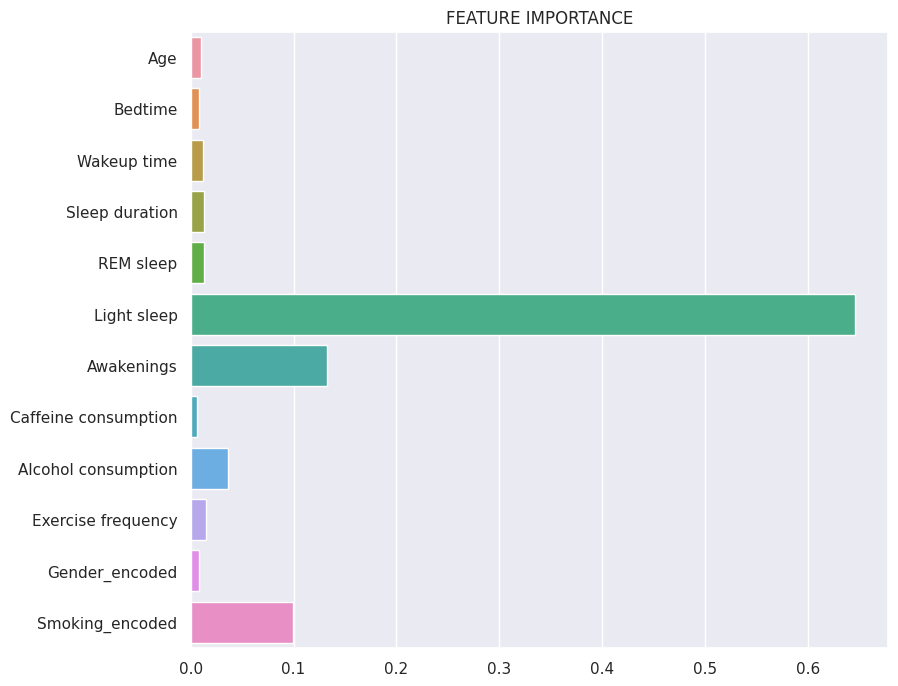

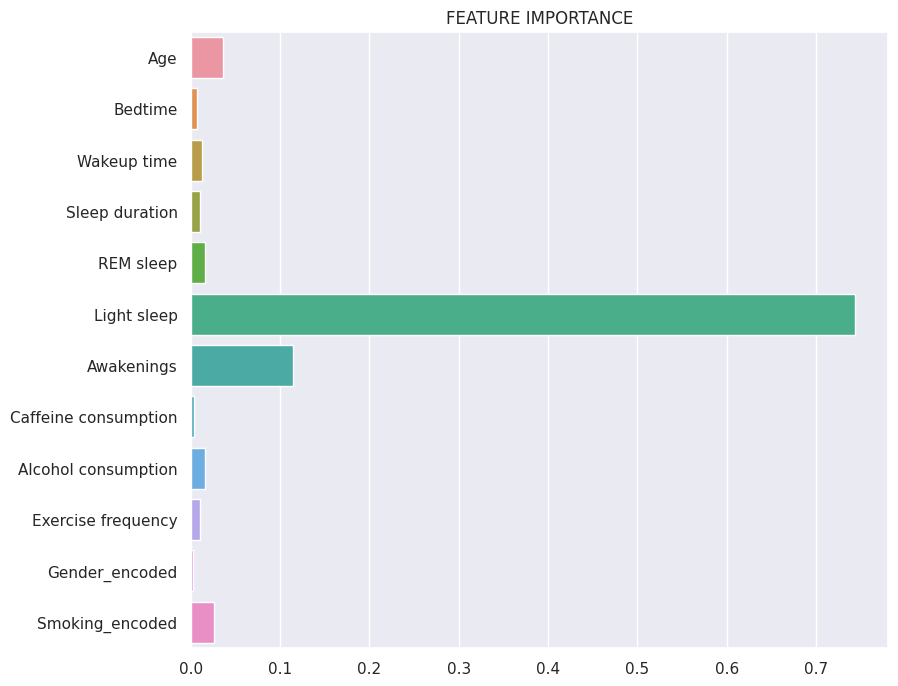

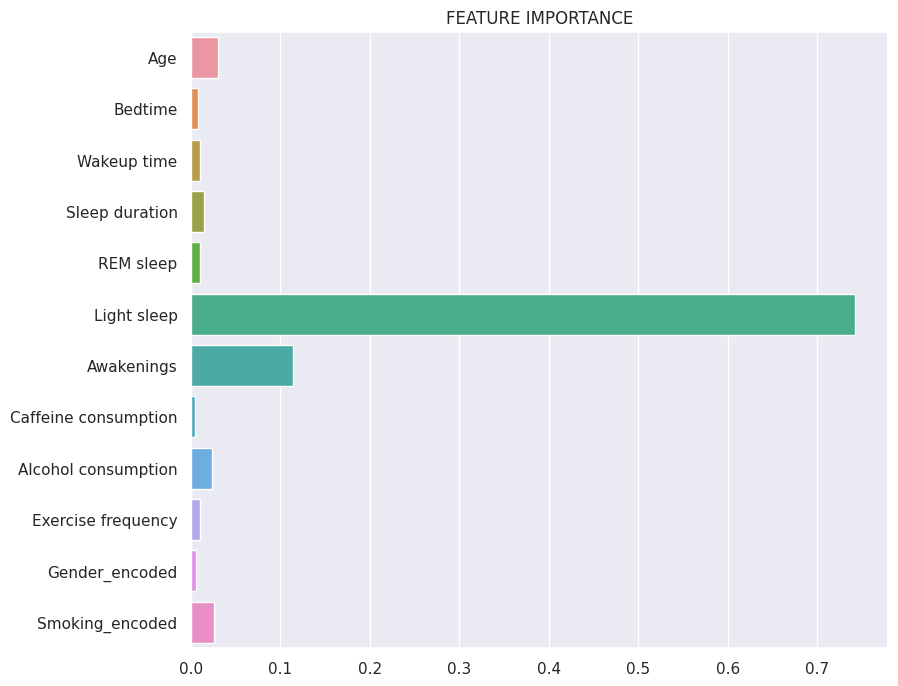

In [ ]:
# Plot the feature importance of the classifier for XGB
sns.set_style('whitegrid')
sns.set_context('poster')
sns.set_palette('colorblind')
sns.set(rc={'figure.figsize':(9,8)})
sns.barplot(x=model_xgb_efficiency.feature_importances_, y=X_efficiency.columns)
plt.title('FEATURE IMPORTANCE')
plt.show()
# Plot the feature importance of the classifier for RandomForest
sns.barplot(x=model_RandomForest_efficiency.feature_importances_, y=X_efficiency.columns)
plt.title('FEATURE IMPORTANCE')
plt.show()
# Plot the feature importance of the classifier for RandomForest
sns.barplot(x=model_DecisionTree_efficiency.feature_importances_, y=X_efficiency.columns)
plt.title('FEATURE IMPORTANCE')
plt.show()